In [22]:
from geopy import distance
import pandas as pd

def cal_distance(data):
    lon1 = data['b.location_lng']
    lat1 = data['b.location_lat']
    lon2 = data['t_lng']
    lat2 = data['t_lat']
    lonlat1 = (lat1,lon1)
    lonlat2 = (lat2,lon2)
    dist = distance.distance(lonlat1,lonlat2).km
    return dist


data = pd.read_csv(r'C:\Users\cc\Documents\经纬度地址匹配\transfer_data.csv')
data = data[['user_id(md5)','是否授信成功,1:是；0:否_x','居住地址.1','b.location_lat','b.location_lng','t_lng','t_lat']]
data['distance'] = data.apply(lambda data: cal_distance(data), axis=1)
print(data)

                         user_id(md5)  是否授信成功,1:是；0:否_x  \
0    a77b3cc1d5428f92c52b648f903258de                 1   
1    4d23373b6caaf9db8c56a908ef091bda                 0   
2    3f59acac815e0ae7a9fcc30bd09111cb                 0   
3    bc5d95ab44cc2e24c1542ca6a0b99e8d                 1   
4    fe64dbb19f9cd1b5aebaf5d8acc47abc                 1   
..                                ...               ...   
339  0f7cc251a27011fc6ac02514b6f9cf43                 1   
340  6b887f83cfbfcd9ed480f4ee44ff45b0                 0   
341  3ccf954e29df41af27c1776e9cb4e745                 1   
342  22522b6393fb726713040810e5d30708                 1   
343  0839ba379fc70ffccd3b513ec8afd448                 1   

                              居住地址.1  b.location_lat  b.location_lng  \
0                       江西省吉安市吉州区北门街       27.127084      115.001554   
1                    甘肃省白银市白银区胜利路52号       36.542636      104.167292   
2                  重庆市重庆市辖区沙坪坝区派出所宿舍       29.707233      106.379389   
3  

In [23]:
data.to_csv(r'C:\Users\cc\Documents\经纬度地址匹配\distance.csv',encoding='utf-8-sig')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id(md5)      344 non-null    object 
 1   是否授信成功,1:是；0:否_x  344 non-null    int64  
 2   居住地址.1            344 non-null    object 
 3   b.location_lat    344 non-null    float64
 4   b.location_lng    344 non-null    float64
 5   t_lng             344 non-null    float64
 6   t_lat             344 non-null    float64
 7   distance          344 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 21.6+ KB


In [28]:
data.describe()

,"是否授信成功,1:是；0:否_x",b.location_lat,b.location_lng,t_lng,t_lat,distance
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.523256,31.006349,112.446416,112.413573,31.026192,17.118654
std,0.500186,5.638131,5.275628,5.335617,5.605670,64.002884
min,0.000000,18.901654,101.948013,99.541236,18.750260,0.010122
25%,0.000000,26.646239,108.524422,108.533966,26.645851,0.866887
50%,1.000000,30.334346,113.484922,113.659734,30.332720,2.479602
75%,1.000000,34.787247,115.518669,115.519248,34.784290,7.626252
max,1.000000,46.083753,127.405292,127.406175,46.084520,605.510293


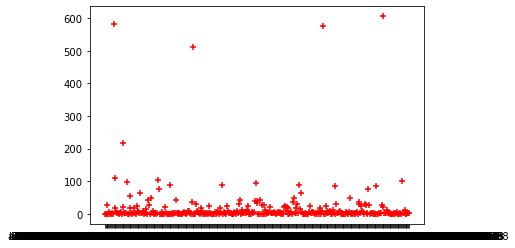

In [26]:
import matplotlib.pyplot as plt

dist = data['distance']
id = data['user_id(md5)']
plt.scatter(id,dist, color='r', marker='+')

(array([89., 92., 60., 31., 21., 28., 10.,  8.,  1.,  4.]),
 array([0.0100709 , 0.64983598, 1.28960106, 1.92936614, 2.56913122,
        3.2088963 , 3.84866138, 4.48842646, 5.12819154, 5.76795662,
        6.4077217 ]),
 <BarContainer object of 10 artists>)

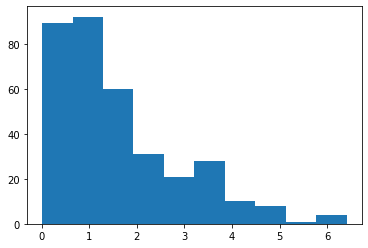

In [32]:
import numpy as np
plt.hist(dist.apply(np.log1p))

(array([164.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

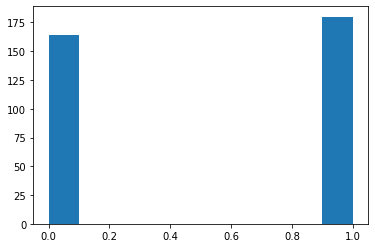

In [29]:
judge = data['是否授信成功,1:是；0:否_x']
plt.hist(judge)

{'whiskers': [<matplotlib.lines.Line2D at 0x233dc673a30>,
 'caps': [<matplotlib.lines.Line2D at 0x233dc61ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x233dc6b2e20>],
 'medians': [<matplotlib.lines.Line2D at 0x233dc6a3280>],
 'fliers': [<matplotlib.lines.Line2D at 0x233dc6a34c0>],
 'means': []}

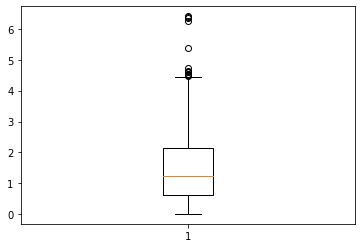

In [43]:
plt.boxplot(dist.apply(np.log1p))

C:\Users\cc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='是否授信成功,1:是；0:否_x', ylabel='distance'>

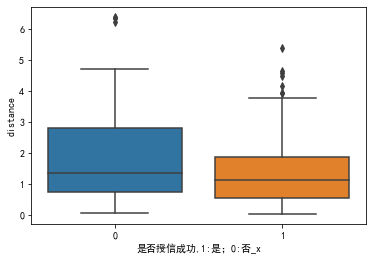

In [54]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示中文

sns.boxplot(judge,dist.apply(np.log1p))


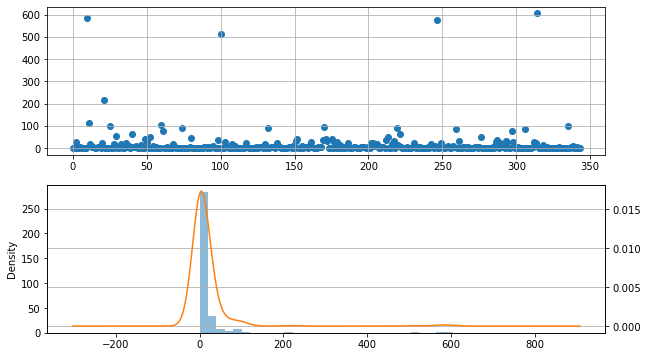

In [37]:
#画散点图和直方图
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(dist.index, dist.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)  # 创建子图2
dist.hist(bins=30,alpha = 0.5,ax = ax2)
dist.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

In [40]:
#导入scipy模块
from scipy import stats
dist1=dist.apply(np.log1p)

"""
kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
结果返回两个值：statistic → D值，pvalue → P值
p值大于0.05，为正态分布
H0:样本符合  
H1:样本不符合 
如何p>0.05接受H0 ,反之 
"""
u = dist1.mean()  # 计算均值
std = dist1.std()  # 计算标准差
stats.kstest(dist1, 'norm', (u, std))

KstestResult(statistic=0.12333554049104267, pvalue=5.098842245156485e-05)